<a href="https://colab.research.google.com/github/ArpanJainGithub/Chatbot-MentalHealth/blob/main/Phase_2_Exploratory_data_analysis_and_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Phase-2: Exploratory data analysis and feature extraction

In [25]:
#EDA
import pandas as pd
import numpy as np
from numpy.linalg import norm
import seaborn as sns
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

#Load Mental_Health_FAQ.csv into a pandas dataframe.
url= 'https://raw.githubusercontent.com/ArpanJainGithub/Chatbot-MentalHealth/main/Mental_Health_FAQ.csv'
mentalHealthFaq = pd.read_csv(url,encoding='unicode_escape')
#mentalHealthFaq = pd.read_csv("/content/drive/MyDrive/AppliedRootsAIML/ChatbotPractice/Mental_Health_FAQ.csv")

In [26]:
#How many data-points and features?
print(mentalHealthFaq.shape)

(98, 3)


In [27]:
#What are the column names in our dataset?
print(mentalHealthFaq.columns)

Index(['Question_ID', 'Questions', 'Answers'], dtype='object')


In [28]:
#Removing all the duplicate rows and keeping the first one
mentalHealthFaq.drop_duplicates(keep='first')
print(mentalHealthFaq.shape)

(98, 3)


In [29]:
#Knowing if there are any datapoints with duplicate value of the column 'Questions'.
mentalHealthFaq['Questions'].is_unique

#If there would be the datapoints with duplicate value of column 'Questions', then the column 'Answers' will also be compared for those datapoints.
#If the value of the column 'Answers' is also duplicate, then only one of these datapoints should be kept and rest should be dropped.
#If the value of the column 'Answers' is not duplicate, then cosine-similarity for the column 'Answers' will be calculated,
#and, if the cosine-similarity resulted in 'No similarity at all', then these datapoints might be errorenous and should be verified manually to confirm if these points can be dropped.

#Case: Questions are duplicate but their answers are not duplicate. Answers are similar.


True

In [30]:
#Check if there is any duplicate values in the column 'Answers'
mentalHealthFaq['Answers'].is_unique

#If there would be the datapoints with duplicate value of column 'Answers', then the value of column 'Questions' will also be compared for those datapoints.
#Cosine-similarity for the column 'Questions' should be calculated, and, if the cosine-similarity resulted in 'No similarity at all', then these datapoints might be errorenous and should be verified manually to confirm if these points can be dropped.

#Case: Answers are duplicate but their Questions are not duplicate. Questions are similar.


True

###Check the no. of similar questions and answers using cosine similarity

Check the no. of similar questions. Then, verify that the given similar questions, should have the similar answers. Incase, there are many points for which the answers for the similar questions are completely different, then, the data should be sent to make the necessary corrections in the data.

Similar process needs to be followed in case of similar answers. That if, answers which have same intent have completely different questions, then the data needs correction.

In [31]:
#Setting the threshold for cosine-similarity.
threshold = 0.6

###Check the no. of similar questions

In [32]:
#Calculate the questions vector
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
question_vector= vectorizer.fit_transform(mentalHealthFaq['Questions'])
print(question_vector.get_shape())

(98, 259)


In [33]:
#Create a dataframe which have all the questions and their cosine-similarities

#Step-1: Calculate the cosine-similarities for each of the questions in the dataset with all the other remaining questions in the dataset.
pairWiseSimilarity = np.zeros((question_vector.shape[0],question_vector.shape[0]))
for i in range(question_vector.shape[0]):        
    for j in range(question_vector.shape[0]):    
      cos_sim = np.dot(question_vector[j][0].toarray().ravel(), question_vector[i].toarray().ravel())/(norm(question_vector[j][0].toarray().ravel())*norm(question_vector[i].toarray().ravel()))
      pairWiseSimilarity[j][i] = cos_sim
pairwiseSimilarityDf = pd.DataFrame(pairWiseSimilarity)

#Step-2: Append the dataframe that has all the questions with the cosine-similarities that are calculated above.
QuestionSimilarityDf = mentalHealthFaq.copy()
for i in range(question_vector.shape[0]):
  QuestionSimilarityDf['Cosine Similarity for question '+ str(i)] = pairwiseSimilarityDf.iloc[:,i] 
QuestionSimilarityDf.head()

,Question_ID,Questions,Answers,Cosine Similarity for question 0,Cosine Similarity for question 1,Cosine Similarity for question 2,Cosine Similarity for question 3,Cosine Similarity for question 4,Cosine Similarity for question 5,Cosine Similarity for question 6,...,Cosine Similarity for question 88,Cosine Similarity for question 89,Cosine Similarity for question 90,Cosine Similarity for question 91,Cosine Similarity for question 92,Cosine Similarity for question 93,Cosine Similarity for question 94,Cosine Similarity for question 95,Cosine Similarity for question 96,Cosine Similarity for question 97
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...,1.000000,0.393491,0.339693,0.174448,0.205596,0.253799,0.059833,...,0.033231,0.054005,0.147935,0.000000,0.000000,0.0,0.143560,0.075550,0.025668,0.034208
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...,0.393491,1.000000,0.324035,0.166407,0.228968,0.220113,0.066634,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...,0.339693,0.324035,1.000000,0.266147,0.313669,0.106901,0.091284,...,0.050698,0.082393,0.037055,0.000000,0.000000,0.0,0.000000,0.000000,0.039160,0.052189
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...,0.174448,0.166407,0.266147,1.000000,0.161083,0.229391,0.046879,...,0.129164,0.042313,0.019030,0.052252,0.000000,0.0,0.078481,0.000000,0.212475,0.084836
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi...",0.205596,0.228968,0.313669,0.161083,1.000000,0.050438,0.094347,...,0.000000,0.000000,0.024344,0.000000,0.027355,0.0,0.000000,0.027041,0.000000,0.000000


In [34]:
#Display the set of similar questions

for i in range(question_vector.shape[0]):  
  if QuestionSimilarityDf.loc[(QuestionSimilarityDf['Cosine Similarity for question '+str(i)] > threshold), ['Question_ID',	'Questions']].shape[0] > 1:
    print("Questions that are similar to the question no. "+str(i)+" is: ")
    print(QuestionSimilarityDf.loc[(QuestionSimilarityDf['Cosine Similarity for question '+str(i)] > threshold), ['Question_ID',	'Questions']]  )
    print("="*100)

Questions that are similar to the question no. 2 is: 
    Question_ID                            Questions
2       6361820          What causes mental illness?
28      4283807  What causes mental health problems?
Questions that are similar to the question no. 6 is: 
    Question_ID                                          Questions
6       1030153  How can I find a mental health professional fo...
10      2553795  How can I find a mental health professional ri...
Questions that are similar to the question no. 8 is: 
    Question_ID                                          Questions
8       1155199  If I become involved in treatment, what do I n...
11      1259439  If I become involved in treatment what do I ne...
Questions that are similar to the question no. 9 is: 
    Question_ID                                          Questions
9       7760466  What is the difference between mental health p...
73      7995219  What's the difference between mental health an...
Questions that are sim

**Observations about the no. of similar *questions*-**

Below is the list of questions ids, where questions have same intention.

1) 6361820, 4283807-	Answers for these questions talk about the same context, but vary in the amount of information. Answer for question- 4283807 provides more precise answer. Combined answer for 6361820 & 4283807 will provide more information about the topic. So, combined answer should be preffered.

2) 9539480, 9630578-	Answers for both the questions are valid, but vary in the amount of information they provide. Answer for 9630578 provide much more information. Hence answer for 9630578 should be preferred.

3) 1155199, 1259439-	Answers for these questions are almost same.




###No. of similar answers-

In [35]:
#Display the set of similar answers

#Create a vector representation for all the answers
answer_vector = vectorizer.fit_transform(mentalHealthFaq['Answers'])
print(answer_vector.get_shape())

(98, 2802)


In [36]:
#Create a dataframe which have all the answers and their cosine-similarities

#Step-1: Calculate the cosine-similarities for each of the answers in the dataset with all the other remaining answers in the dataset.
pairWiseSimilarity = np.zeros((answer_vector.shape[0],answer_vector.shape[0]))
for i in range(answer_vector.shape[0]):        
    for j in range(answer_vector.shape[0]):    
      cos_sim = np.dot(answer_vector[j][0].toarray().ravel(), answer_vector[i].toarray().ravel())/(norm(answer_vector[j][0].toarray().ravel())*norm(answer_vector[i].toarray().ravel()))
      pairWiseSimilarity[j][i] = cos_sim
pairwiseSimilarityDf = pd.DataFrame(pairWiseSimilarity)

# Step-2: Append the calculated cosine-similarities with the dataframe that contains the questions and answers
AnswerSimilarityDf = mentalHealthFaq.copy()
for i in range(answer_vector.shape[0]):
  AnswerSimilarityDf['Cosine Similarity for answer '+ str(i)] = pairwiseSimilarityDf.iloc[:,i] 
AnswerSimilarityDf.head()

,Question_ID,Questions,Answers,Cosine Similarity for answer 0,Cosine Similarity for answer 1,Cosine Similarity for answer 2,Cosine Similarity for answer 3,Cosine Similarity for answer 4,Cosine Similarity for answer 5,Cosine Similarity for answer 6,...,Cosine Similarity for answer 88,Cosine Similarity for answer 89,Cosine Similarity for answer 90,Cosine Similarity for answer 91,Cosine Similarity for answer 92,Cosine Similarity for answer 93,Cosine Similarity for answer 94,Cosine Similarity for answer 95,Cosine Similarity for answer 96,Cosine Similarity for answer 97
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...,1.000000,0.302523,0.302771,0.195047,0.307228,0.211164,0.142722,...,0.167825,0.197590,0.171212,0.204607,0.197039,0.191577,0.228129,0.208506,0.195733,0.142231
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...,0.302523,1.000000,0.990480,0.241830,0.242753,0.175721,0.092176,...,0.126468,0.156042,0.203184,0.171447,0.176694,0.168886,0.202434,0.227019,0.174159,0.141046
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...,0.302771,0.990480,1.000000,0.242028,0.242952,0.175865,0.092252,...,0.126572,0.156170,0.203351,0.171587,0.176839,0.169025,0.202600,0.227206,0.174302,0.141162
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...,0.195047,0.241830,0.242028,1.000000,0.152897,0.131965,0.070623,...,0.184014,0.147607,0.113447,0.189903,0.201126,0.188143,0.158251,0.227869,0.127135,0.102210
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi...",0.307228,0.242753,0.242952,0.152897,1.000000,0.216171,0.124739,...,0.128186,0.167314,0.193080,0.168293,0.212459,0.159320,0.199330,0.189579,0.171015,0.138335


In [37]:
#Display the set of similar answers
for i in range(answer_vector.shape[0]):  
  if AnswerSimilarityDf.loc[(AnswerSimilarityDf['Cosine Similarity for answer '+str(i)] > threshold), ['Question_ID',	'Answers']].shape[0] > 1:
    print("Answers that are similar to the answer no. "+str(i)+" is: ")
    print(AnswerSimilarityDf.loc[(AnswerSimilarityDf['Cosine Similarity for answer '+str(i)] > threshold), ['Question_ID',	'Answers']])
    print("="*100)

Answers that are similar to the answer no. 1 is: 
   Question_ID                                            Answers
1      2110618  It is estimated that mental illness affects 1 ...
2      6361820  It is estimated that mental illness affects 1 ...
Answers that are similar to the answer no. 2 is: 
   Question_ID                                            Answers
1      2110618  It is estimated that mental illness affects 1 ...
2      6361820  It is estimated that mental illness affects 1 ...
Answers that are similar to the answer no. 6 is: 
    Question_ID                                            Answers
6       1030153  Feeling comfortable with the professional you ...
10      2553795  Feeling comfortable with the professional you ...
Answers that are similar to the answer no. 8 is: 
    Question_ID                                            Answers
8       1155199  Since beginning treatment is a big step for in...
11      1259439  Beginning treatment is a big step for individu...
An

###Observations about the similar answers:

Below is the list of questions ids, where answers have same intention.

1) 2110618, 6361820- Questions for these answers have different intentions. This answer is suitable for the question- 2110618, but does not answer the question- 6361820.

2) 1030153, 2553795- Both of these questions are similar.

3) 1155199, 1259439- Both of these questions have same intention.


###Length of questions and answers

In [38]:
LengthOfQuestion = []
LengthOfAnswer = []
for i in range(mentalHealthFaq.shape[0]):    
  LengthOfQuestion.append(len(re.split(r'[\s]\s*',mentalHealthFaq.iloc[i,1])))
  LengthOfAnswer.append(len(re.split(r'[\s]\s*',mentalHealthFaq.iloc[i,2])))  
mentalHealthFaq['Length of question'] = LengthOfQuestion
mentalHealthFaq['Length of answer'] = LengthOfAnswer
mentalHealthFaq.head()

,Question_ID,Questions,Answers,Length of question,Length of answer
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...,9,208
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...,5,189
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...,4,189
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...,10,192
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi...",6,94


In [39]:
# Maximum and minimum length of questions and answers
print("Maximum length of question")
print(mentalHealthFaq['Length of question'].max())
print("Minimum length of question")
print(mentalHealthFaq['Length of question'].min())

Maximum length of question
39
Minimum length of question
3


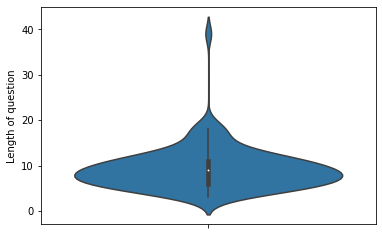

In [40]:
#Violin plot has been used here as it gives the combined benefit of Histograms and Box-plots.
#Plotting the violin plot for the Length of questions

sns.violinplot(y="Length of question", data=mentalHealthFaq, size=8)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


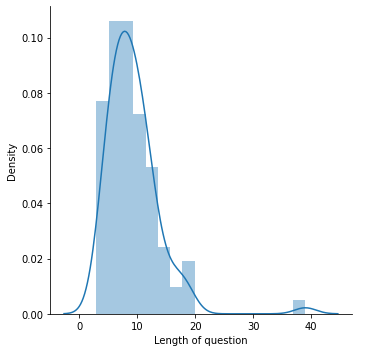

In [41]:
#Plotted the histogram for the length of questions. Plotted histogram to check if more clear idea information can be told about the length of questions.
sns.FacetGrid(mentalHealthFaq, size=5) \
   .map(sns.distplot, "Length of question") \
   .add_legend();
plt.show();

In [42]:
#Checking for the outliers points on the basis on length of the questions. Questions with too small length can be the outlier.

#Referred the below link for knowing the average length of abstract in general psycology. No information mentioned in this link has been used.
#Just mentioning the link, in case it is needed moving forward.
#https://books.google.co.in/books?id=M4kqAAAAMAAJ&pg=RA36-PP10&lpg=RA36-PP10&dq=What+is+the+average+number+of+words+in+the+mental+health+related+queries&source=bl&ots=njXSfsHqxt&sig=ACfU3U3leyUeY2PKKn7nX0DlMBcT6Yp5TQ&hl=en&sa=X&ved=2ahUKEwjr5vOatP_0AhWV_XMBHfMtDxgQ6AF6BAg2EAM#v=onepage&q=What%20is%20the%20average%20number%20of%20words%20in%20the%20mental%20health%20related%20queries&f=false

#Get all the questions whose length is less than 4 words. Has taken the length '4' just on the basis of common sense.
print("Questions whose length is smaller than 4:")
mentalHealthFaq[mentalHealthFaq['Length of question'] <4]

#Get all the questions whose length is more than 30 words
print("Questions whose length is greater than 30:")
mentalHealthFaq[mentalHealthFaq['Length of question'] >20]

Questions whose length is smaller than 4:
Questions whose length is greater than 30:


,Question_ID,Questions,Answers,Length of question,Length of answer
72,2447683,Cannabis is legally allowed to 19+ but there a...,Using cannabis has the potential for benefits ...,39,473


In [43]:
print("Maximum length of answer")
print(mentalHealthFaq['Length of answer'].max())
print("Minimum length of answer")
print(mentalHealthFaq['Length of answer'].min())

Maximum length of answer
1441
Minimum length of answer
16


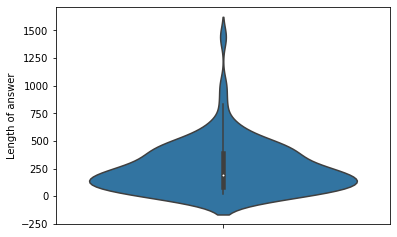

In [44]:
#Plotting the violin plot for the Length of answers

sns.violinplot(y="Length of answer", data=mentalHealthFaq, size=8)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


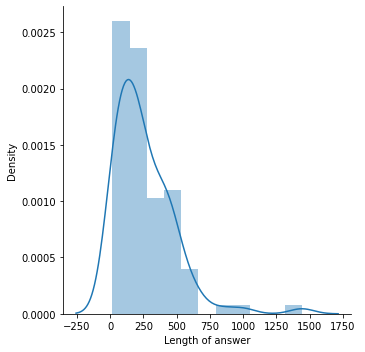

In [45]:
#Plotted the histogram for the length of answer. Plotted histogram to check if more clear idea information can be told about the length of answers.
sns.FacetGrid(mentalHealthFaq, size=5) \
   .map(sns.distplot, "Length of answer") \
   .add_legend();
plt.show();

In [46]:
#Checking for the outliers points on the basis on length of the answers. Answers with too small/long length can be the outlier.
#Referred the below link for knowing the average length of abstract in general psycology. No information mentioned in this link has been used.
#Just mentioning the link, in case it is needed moving forward.
#https://books.google.co.in/books?id=M4kqAAAAMAAJ&pg=RA36-PP10&lpg=RA36-PP10&dq=What+is+the+average+number+of+words+in+the+mental+health+related+queries&source=bl&ots=njXSfsHqxt&sig=ACfU3U3leyUeY2PKKn7nX0DlMBcT6Yp5TQ&hl=en&sa=X&ved=2ahUKEwjr5vOatP_0AhWV_XMBHfMtDxgQ6AF6BAg2EAM#v=onepage&q=What%20is%20the%20average%20number%20of%20words%20in%20the%20mental%20health%20related%20queries&f=false

#Get all the answers whose length is more than 750 words. Used '750' here, as it is visible from the above histogram that there are very less answers of length more than 750 words.
print("Answers whose length is greater than 750 words are:")
mentalHealthFaq[mentalHealthFaq['Length of answer'] >750]

Answers whose length is greater than 750 words are:


,Question_ID,Questions,Answers,Length of question,Length of answer
40,7535002,How can I challenge thinking traps?,What you tell yourself about a situation affec...,6,1000
68,3839472,Someone I love has been diagnosed with depress...,We naturally want to help a loved one who isnâ...,12,834
69,3055896,Someone I love has been diagnosed with schizop...,We naturally want to help a loved one who isnâ...,12,1441


###Word cloud for Questions

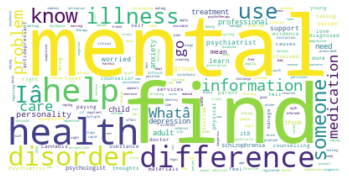

In [47]:
#Reffered https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/
# Creating word_cloud with text as argument in .generate() method
text2 = " ".join(Question for Question in mentalHealthFaq.Questions)
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In the above word cloud, the larger the font size of a word is, the more frequently it has appeared in the questions.
Got the words which have occured most frequently in the list of questions.

###Summarizing the conclusions about the data-

Q1- Number of data points?

Ans- 98


Q2- Number of unique questions?

Ans- 98


Q3- Number of unique answers?

Ans- 98


Q4- Number of similar (which have the absolute same intent, but can vary in the language) questions?

Ans- There are 3 pair of similar questions, i.e., out of these 6 questions, 3 questions have the absolute same intent as the remaining 3 questions.
Below is the list of questions ids, for which questions are similar. Given the questions are similar, a comment has been made about the nature of their answers.

1) 6361820, 4283807- Answers for these questions talk about the same context, but vary in the amount of information. Answer for question- 4283807 provides more precise answer. Combined answer for 6361820 & 4283807 will provide more information about the topic. So, combined answer should be preffered.

2) 9539480, 9630578- Answers for both the questions are valid, but vary in the amount of information they provide. Answer for 9630578 provide much more information. Hence answer for 9630578 should be preferred.

3) 1155199, 1259439- Answers for these questions are almost same.


Q5- Number of similar (which have the absolute same intent, but can vary in the language) answers?

Ans- There are 3 pair of similar answers, i.e., out of these 6 answers, 3 answers have the absolute same intent as the remaining 3 questions.
Below is the list of questions ids, for which answers are similar. Given the answers are similar, a comment has been made about the nature of their questions.

1) 2110618, 6361820- Questions for these answers have different intentions. This answer is suitable for the question- 2110618, but does not answer the question- 6361820.

2) 1030153, 2553795- Both of these questions are similar.

3) 1155199, 1259439- Both of these questions have same intention.

Q6- What is the length of the question?

Ans- 8 words is the average length of the questions. Maximum length is 39, and minimum length is 3.

Q7- What is the length of the answer?

Ans- 130 words is the average length of the answers. Maximum length is 1441, and minimum length is 16.


##Overall- 

1) Data does not have any outlier points. 

2) Data quality looks good.